# Network using Auto-differentiation
Purpose: To derive a version of my Network module that uses AD.

In [1]:
import numpy as np
from utils import *
import NetworkAD as nnad
from joMatAD import *
from copy import deepcopy
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Dataset

In [2]:
# This creates a dataset
n_classes = 3
in_dim = 2

np.random.seed(250)
B = np.eye(n_classes)
A = 3.*(np.random.rand(n_classes, in_dim) - 0.5)

In [3]:
ds = SimpleDataset(A, B, n=100, noise=0.1)

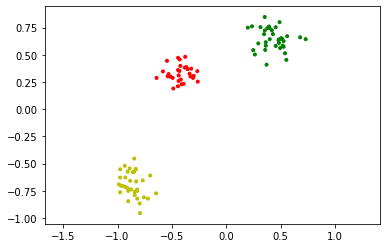

In [4]:
ds.Plot()

In [5]:
dl = MyDataLoader(ds, batchsize=10, shuffle=False)

## Create Network

In [12]:
# DenseLayer: combines dense connection weights and an activation function
net = nnad.Network()
cl1 = nnad.DenseLayer(in_nodes=2, out_nodes=10, act=MatReLU)
cl2 = nnad.DenseLayer(in_nodes=10, out_nodes=3, act=MatLogistic)
net.AddLayer(cl1)
net.AddLayer(cl2)

# Define the Loss function
net.Loss = MatMeanCE

# You can also define a loss function using composition, like this...
#net.Loss = (lambda a,b: MatBatchMean( MatCE(a,b) ) )

lrate = 1.

In [15]:
# Run the network
y = net(ds.Inputs())

# Evaluate it
loss = net.Loss(y, ds.Targets())
print(loss())

[[0.00080907]]


## Training

In [14]:
# Stochastic Gradient Descent
loss = net.Learn(dl, lrate=lrate, epochs=100)

In [9]:
# Post-training evalutation
loss = net.Loss( net(ds.Inputs()), ds.Targets())
print(loss())

[[0.00084945]]


## See the output

In [10]:
np.round( net.h[-1]()[:10,:], 3)

array([[0.   , 1.   , 0.   ],
       [0.998, 0.003, 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ]])

In [11]:
ds.Targets()[:10,:]

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])